# **Jamboree Business Case Study**

###**About**:                                                          
Jambore is an Educational institute it assists the students in achieving Top score in standardised tests like **GMAT**,**GRE**,**SAT**. It has recently introduced a new feature aimed at estimating the probability of getting admission into **IVY League colleges** for indian students,
IVY League colleges are group of 8 private research universities in Northeastern United states that are known for thier academic excellence and prestigious reputation  


###     **Objective**:
The Objective of this case study is to conduct an Exploratory Data Analysis and Build a predictive model using Linear regression to understand the key factors influencing graduate admissions and Provide actionable insights to jamboree based on the analysis finally to Offer the recommendations on how jamboree can leverage this information to enhance their services and better assists students in achieving their academic goals



In [ ]:
#Importing the Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [ ]:
#Creating a Data frame
df=pd.read_csv('/content/drive/MyDrive/Pandas Practice data sets/Jamboree_Admission.csv')

In [ ]:
#Fetching the last 5 records from the Data Frame
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


**Observation**

the Data Frame is a long format data  with 500 rows and  9 columns


In [ ]:
#Shape of the data
df.shape

(500, 9)

**Observation**
1. There are no missing values in any of the columns (all columns have 500 non-null entries) which indicates that it is a clean data set
2. The memory usage of the dataset is 35.3 KB which is relatively small

In [ ]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


**Observation**

There are no Null values present in the dataset

In [ ]:
#Secondary check
#Checking for presense of null values
df.isna().sum().sum()

0

**Observation**

The descriptive overview of the numerical data looks good but to further investigtion need to be done to confirm the presense of Outliers in the data

In [ ]:
#Statistical Summary of the data
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

## **Univariate Analysis**

### **Box Plot for all the numerical columns**

**Observation**

1.There is presence of outliers in the LOR and Chance of admit

futher investigation is needed to treate these outliers

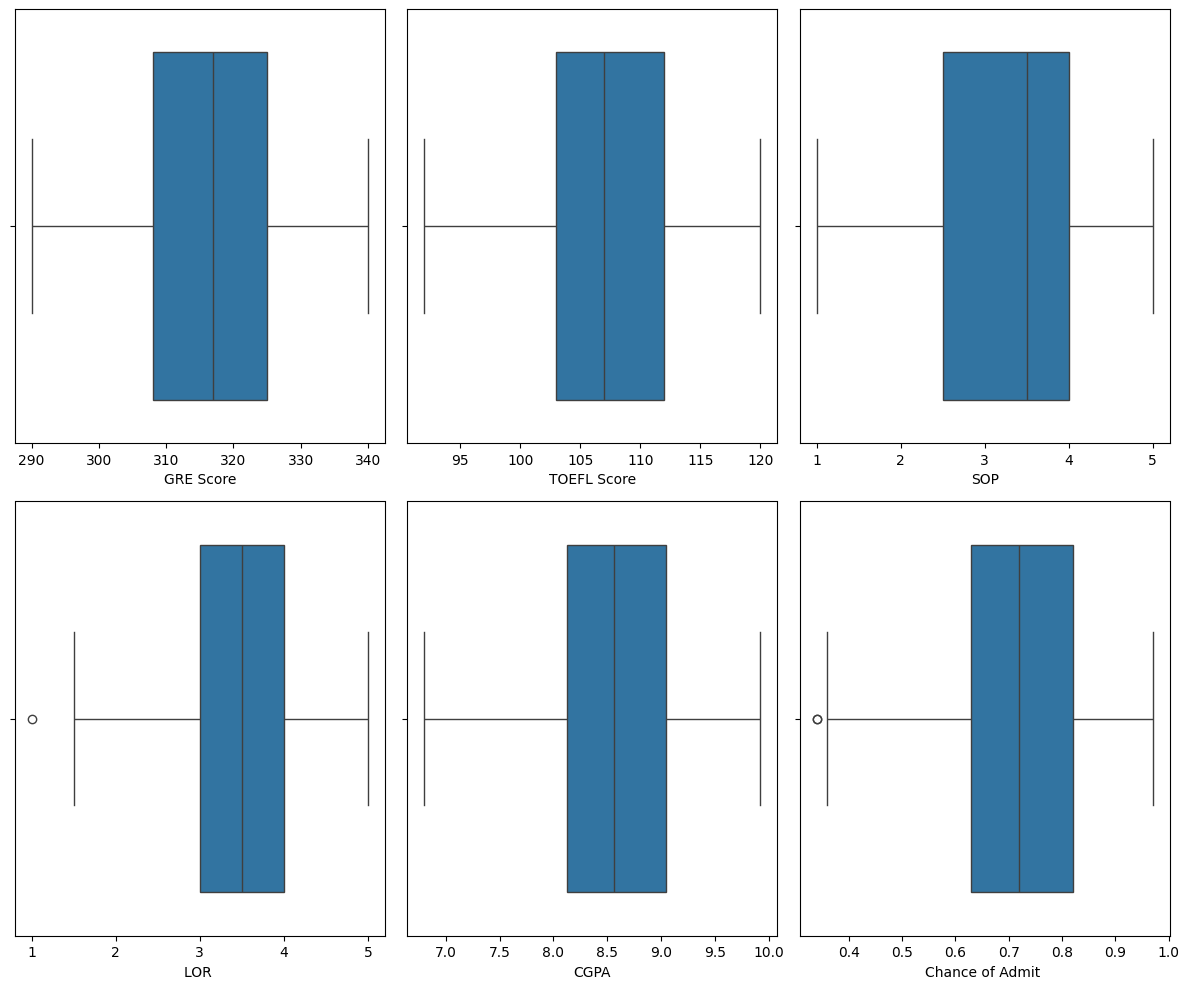

In [ ]:
numerical_columns=df.select_dtypes(include=['number']).drop(columns=['Serial No.','Research','University Rating'])

#set the figure size
plt.figure(figsize=(12,10))

#iterate over the numerical columns

for i,column in enumerate(numerical_columns.columns,1):
  plt.subplot(2,3,i)
  sns.boxplot(data=df,x=column)
plt.tight_layout()
plt.show()

### **Histogram**

**Observation**
1. Not all the Distributions are normally distributed
2. Distribution of CGPA scores Looks symmetric with mean value of 8.5 CGPA
   
   further investigation is needed to confirm the normality of CGPA scores


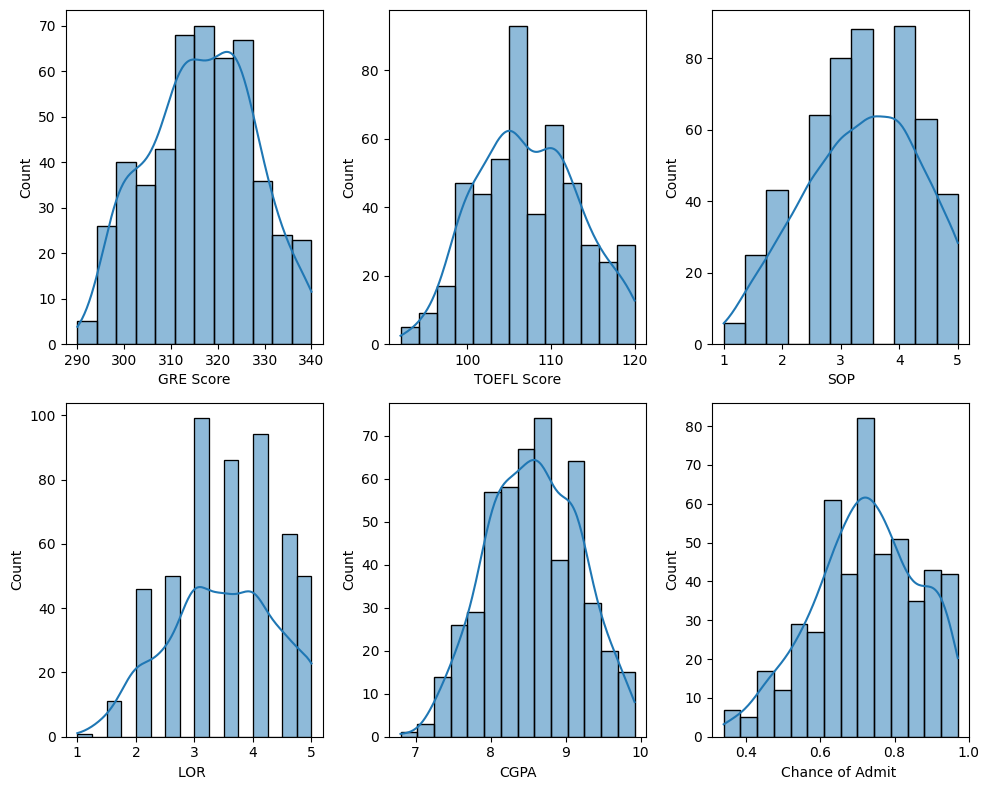

In [ ]:
#lets see the distribution of CGPA scores
plt.figure(figsize=(10,8))

for i,column in enumerate(numerical_columns.columns,1):
  plt.subplot(2,3,i)
  sns.histplot(data=df,x=column,kde=True)
plt.tight_layout()
plt.show()

**Statistical Testing**

In [ ]:
# Null Hypothesis H0: the distribution is normal
# Alternate Hypothesis Ha: the distribution is not normal

stat,p=shapiro(df['CGPA'])
print(" Statistic:",stat,"\n","P_value:",p)

if p<0.05:
  print(' Reject Null hypothesis: The distribution is not normal')
else:
  print(' Fail t reject Null hypothesis: We Assume that the distribution is normal')

 Statistic: 0.9922108054161072 
 P_value: 0.010292120277881622
 Reject Null hypothesis: The distribution is not normal


### **Pie Chart** (to understand the propotion of college ratings)

**Observation**

Only 6.8 % of colleges were rated as 1,Almost 33% of colleges were rated as 3



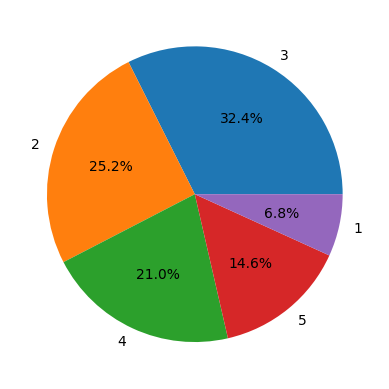

In [ ]:
value_counts=df['University Rating'].value_counts()
plt.pie(value_counts,labels=value_counts.index,autopct="%1.1f%%")
plt.show()

## **Bivariate Analysis**

### **Scatter Plot**
1. The relationship between the CGPA Scores and Chance of Admission is positive
2. Both these values are linearly related

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

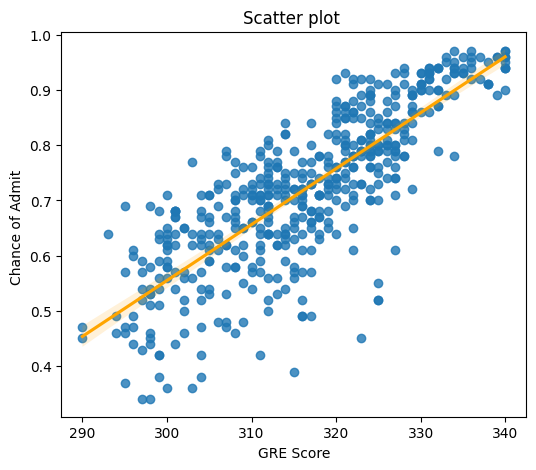

In [ ]:
plt.figure(figsize=(6,5))
# sns.scatterplot(data=df, x='GRE Score', y='Chance of Admit ', palette='viridis',hue='University Rating')
sns.regplot(data=df,x='GRE Score',y='Chance of Admit ',line_kws={'color':'orange'})
plt.title('Scatter plot ')
plt.show()

**Observation**

The data poits are Scattered around the trend line hence the linear relation is confirmed

### **Heat Map**

**Observations**

1. **CGPA - Chance of Admin**--(highest correlation)  which indicates that

     students with high CGPA tend to have high chances of getting Admission
2. GRE Score - Chance of Admit and TOFEL Score -Chance of Admit also have good correlation (makes sense)
3. LOR(Letter of recommendation)- Research Has positive but relatively weak which means LOR and Research are independent factors that contribute differently to the admission process there are other factors that strongly influence the Applicaiton process
4. it is observed that GRE and TOFEL scores were redundent hence dropping one of these columns

<Axes: >

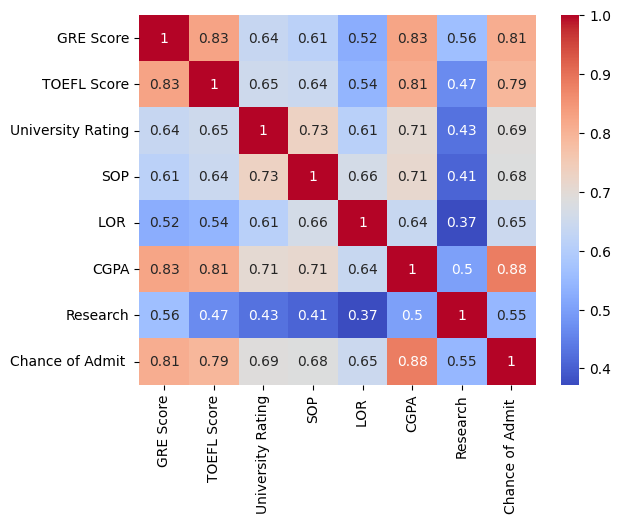

In [ ]:
df2=df.drop(columns='Serial No.')
correlation=df2.corr()
sns.heatmap(correlation,annot=True,cmap ='coolwarm')

In [ ]:
# df.drop(columns='TOEFL Score')

## **2. Data Preprocessing**



#### **Duplicate Values Check**


**Observation**

The data set does not contain any duplidate rows

In [ ]:
df.duplicated().sum()

0

#### **Missing Values Treatment**

**Observation**

The data set does not contain any missing values

In [ ]:
df.isnull().sum().sum()

0

#### **Outier Treatment**



<Axes: ylabel='LOR '>

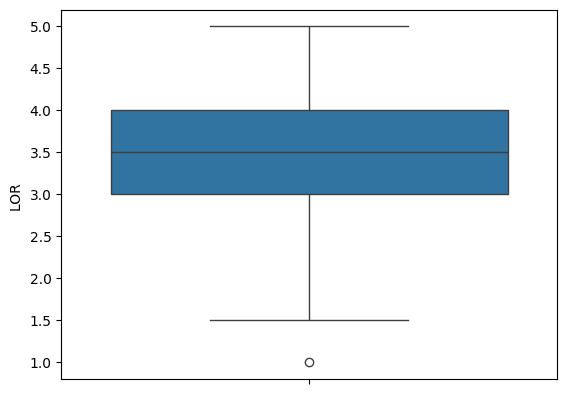

In [ ]:
sns.boxplot(df['LOR '])

In [ ]:
#using IQR method
Q1,Q3=df['LOR '].quantile([0.25,0.75])

IQR=Q3-Q1

#Finding lower and upper limits

UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

#empty list for outliers

outlier_values=[]

#iterating over the column to fetch outliers
for x in df['LOR ']:
  if ((x>UL) or (x<LL)):
    outlier_values.append(x)
print(outlier_values)

[1.0]


In [ ]:
#Assigning Nan value to outlier data
df['LOR '].values[df['LOR ']>UL]=np.nan
df['LOR '].values[df['LOR ']<LL]=np.nan

df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  1
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
#removing outliers
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<Axes: ylabel='Chance of Admit '>

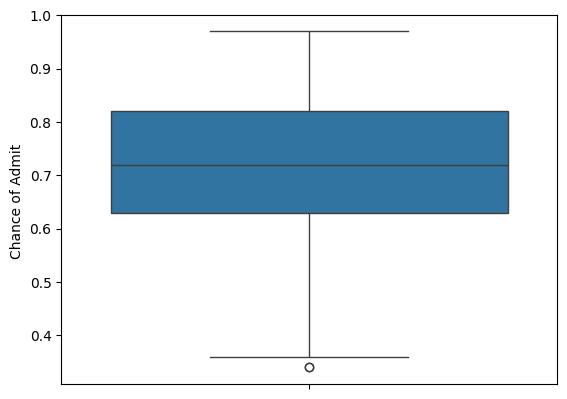

In [ ]:
sns.boxplot(df['Chance of Admit '])

In [ ]:
#using IQR method
Q1,Q3=df['LOR '].quantile([0.25,0.75])

IQR=Q3-Q1

#Finding lower and upper limits

UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

#empty list for outliers

outlier_values=[]

#iterating over the column to fetch outliers
for x in df['LOR ']:
  if ((x>UL) or (x<LL)):
    outlier_values.append(x)

#Assigning Nan value to outlier data
df['LOR '].values[df['LOR ']>UL]=np.nan
df['LOR '].values[df['LOR ']<LL]=np.nan
#removing outliers
df.dropna(inplace=True)
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         499 non-null    int64  
 1   GRE Score          499 non-null    int64  
 2   TOEFL Score        499 non-null    int64  
 3   University Rating  499 non-null    int64  
 4   SOP                499 non-null    float64
 5   LOR                499 non-null    float64
 6   CGPA               499 non-null    float64
 7   Research           499 non-null    int64  
 8   Chance of Admit    499 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 39.0 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#for our data target variable is Chance of Admit
#remaining columns are input data
y=df['Chance of Admit ']
X=df.drop('Chance of Admit ',axis=1)
X.shape,y.shape

((499, 8), (499,))

so we have to,
- predict one output feature
- with the help of 8 features

Lets split the data
- 70% of the data is for training
- 30% of data is for testing

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape,y_train.shape

((349, 8), (349,))

In [ ]:
X_test.shape,y_test.shape

((150, 8), (150,))

In [ ]:
#applying linear regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 6.23053040e-05,  1.34668139e-03,  3.92825555e-03,  9.11867951e-03,
       -2.81380170e-04,  1.54259703e-02,  1.10306421e-01,  2.96464094e-02])

In [ ]:
model.intercept_

-1.182768369012317

In [ ]:
y_hat=model.predict(X_test)

In [ ]:
model.score(X_train,y_train)

0.8324051815706038

In [ ]:
model.score(X_test,y_test)

0.8095363922455943